# Figure 2: Distribution of Jacobian matrix elements

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import distributions
import statistics
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import random
import sympy as sp
import os
import argparse
from scipy.signal import argrelextrema
from sympy.utilities import lambdify
from fitter import Fitter, get_common_distributions, get_distributions
import scipy.stats 

Empirical data from parameter sampling

In [2]:
path2 = '/Users/aibekk99/Desktop/publication/code/2x2tr.csv'
df2 = pd.read_csv(path2)
df2.head()

,First Entry,Second Entry,Third Entry,Fourth Entry
0,0.105125,-0.034808,1.789175,-0.471726
1,0.194937,-0.257030,1.598743,-0.943998
2,0.066236,-0.059841,0.848689,-0.259751
3,0.304850,-0.395355,1.528574,-0.584712
4,0.125374,-0.291609,1.131442,-0.624166


Probability distribution fitting

In [5]:
# fitting distributions
entry1 = df2['First Entry']
entry2 = df2['Second Entry']
entry3 = df2['Third Entry']
entry4 = df2['Fourth Entry']

def fitter(entry):
    f = Fitter(np.array(entry, dtype=float),
           distributions=['gamma',
                          'lognorm',
                          "expon",
                          "beta",
                          "burr",
                          "norm",
                          "uniform",
                          "cauchy",
                          "chi",
                          "erlang"
                          "levy",
                          "rayleigh"])
    f.fit()
    fit = f.fitted_param.get('beta', None)
    return fit

#f.fit()
#f.summary()

# beta distribution parameters 
params1 = fitter(entry1)
params2 = fitter(entry2)
params3 = fitter(entry3)
params4 = fitter(entry4)

Fitting 11 distributions: 100%|██████████| 11/11 [00:00<00:00, 59.32it/s]


Plotting the fitted distributions

[]

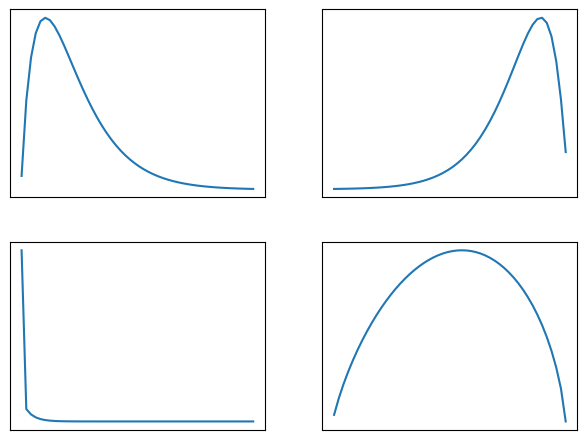

In [7]:
# plotting distributions
fig, axs = plt.subplots(2, 2)
fig.tight_layout()

#axs.set_yscale('log')
x1 = np.linspace(np.min(np.array(entry1, dtype=float)), np.max(np.array(entry1, dtype=float)))
axs[0,0].plot(x1, scipy.stats.beta.pdf(x1, params1[0], params1[1], loc=params1[2], scale=params1[3]),)
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])
#axs[0,0].set_title('Gamma Distribution', fontsize = 10, fontweight = 'bold')
#
x2 = np.linspace(np.min(np.array(entry2, dtype=float)), np.max(np.array(entry2, dtype=float)))
axs[0,1].plot(x2, scipy.stats.beta.pdf(x2, params2[0], params2[1], loc=params2[2], scale=params2[3]),)
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])
#axs[0,1].set_title('Gamma Distribution', fontsize = 10, fontweight = 'bold')
#
x3 = np.linspace(np.min(np.array(entry3, dtype=float)), np.max(np.array(entry3, dtype=float)))
axs[1,0].plot(x3, scipy.stats.beta.pdf(x3, params3[0], params3[1], loc=params3[2], scale=params3[3]),)
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])
#axs[1,0].set_title('Exponential Distribution', fontsize = 10, fontweight = 'bold')
#
x4 = np.linspace(np.min(np.array(entry4, dtype=float)), np.max(np.array(entry4, dtype=float)))
axs[1,1].plot(x4, scipy.stats.beta.pdf(x4, params4[0], params4[1], loc=params4[2], scale=params4[3]),)
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])